# Citation

## Table of Contents:
* [Do you care for making your software citable?](#Do-you-care-for-making-your-software-citable?)
* [Did you ever reference or acknowledge software in a publication?](#Did-you-ever-reference-or-acknowledge-software-in-a-publication?)
* [How do you reference software in a publication?](#How-do-you-reference-software-in-a-publication?)

### Setting up

In [1]:
# Import notebook containing sampled dataset
%run "./00_data-cleaning.ipynb"

In [2]:
# Filtering the df
df = df[(df['Do you write code as part of your job?'] =='Yes')]

### Do you care for making your software citable?

In [3]:
# Do you care for making your software citable?
count = df['Do you care for making your software citable?'].value_counts()
results = pd.DataFrame(count.values, count.index)
display(results)

,0
No,414
Yes,198


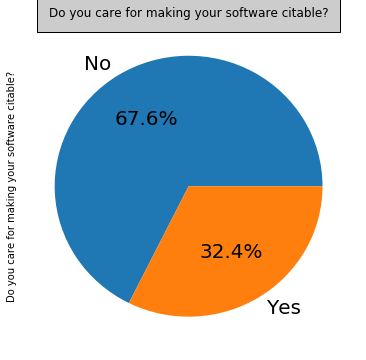

In [4]:
# making your software citable
df.groupby('Do you care for making your software citable?')['Do you care for making your software citable?'].count().plot.pie( autopct='%1.1f%%',figsize=(6,6), fontsize = 20)
count = df['Do you care for making your software citable?'].value_counts()

plt.title('Do you care for making your software citable?', bbox={'facecolor':'0.8', 'pad':12})
plt.show()

### Did you ever reference or acknowledge software in a publication?

In [5]:
# Did you ever reference or acknowledge software in a publication?
count = df['Did you ever reference or acknowledge software in a publication?'].value_counts()
results = pd.DataFrame(count.values, count.index)
display(results)

,0
Yes,357
No,255


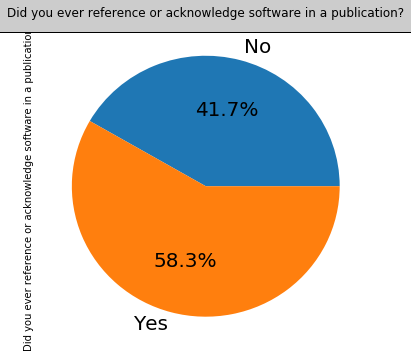

In [6]:
# Pie Chart reference or acknowledge software in a publication
df.groupby('Did you ever reference or acknowledge software in a publication?')['Did you ever reference or acknowledge software in a publication?'].count().plot.pie( autopct='%1.1f%%',figsize=(6,6), fontsize = 20)

count = df['Did you ever reference or acknowledge software in a publication?'].value_counts()

plt.title('Did you ever reference or acknowledge software in a publication?', bbox={'facecolor':'0.8', 'pad':12})
plt.show()

### How do you reference software in a publication?

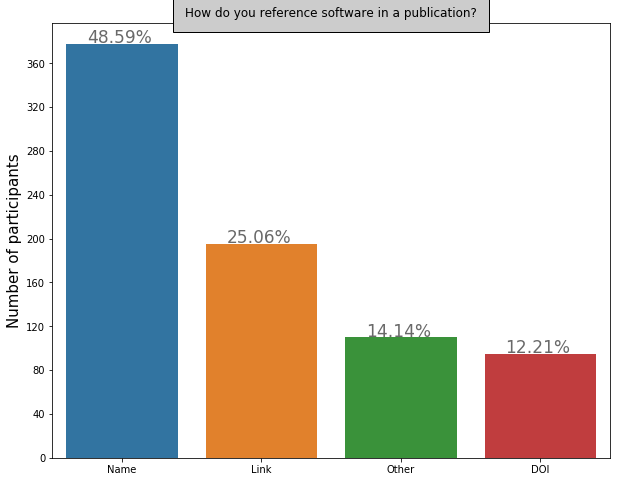

In [7]:
# how reference software - einzeln
languages = ['Name', 'Link', 'DOI', 'Other']

def find(df, column, list):
    number = {}
    for key in list:
        counts = df[column].str.contains(key).value_counts()
        if counts.index.contains(True):
            number.update({key: counts[True]})
        else:
            number.update({key: 0})
    return number

number = find(df, 'How do you reference software in a publication? Please select all that apply.', languages)
plot_data = pd.DataFrame(number, index=[0])

plot_data = plot_data.sort_values(by=[0], axis=1, ascending=False)
plot_data.drop([col for col, val in plot_data.sum().iteritems() if val<1], axis=1, inplace=True)


plt.figure(figsize=(10,8))
fig = sns.barplot(data=plot_data, orient='v')
fig.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('How do you reference software in a publication?', bbox={'facecolor':'0.8', 'pad':12})
plt.ylabel('Number of participants', fontsize=15)
plt.xlabel('', fontsize=15)

ax = plt.gca()
totals = []
for i in ax.patches:
    totals.append(i.get_height())
    
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+ 0.15, i.get_height()+.9, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=17,
                color='dimgrey')
plt.show()

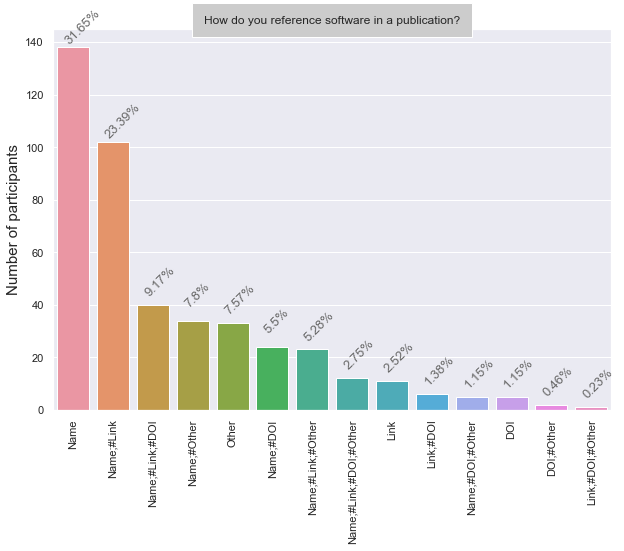

In [8]:
# how reference software - in kombi
plt.figure(figsize=(10,7))
count = df['How do you reference software in a publication? Please select all that apply.'].value_counts()

#results = pd.DataFrame(count.values, count.index)
#results.columns = ['Who use the code']
#display(results)

sns.set(style="darkgrid")
sns.barplot(count.index, count.values)
plt.xticks(rotation= 90)
plt.title('How do you reference software in a publication?', bbox={'facecolor':'0.8', 'pad':12})
plt.ylabel('Number of participants', fontsize=15)
plt.xlabel('', fontsize=15)

ax = plt.gca()
totals = []
for i in ax.patches:
    totals.append(i.get_height())
    
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+ 0.15, i.get_height()+12, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='dimgrey', rotation=45)
plt.show()